In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3553, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557,3,2,1,1,Moderately Old,783.0,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519,3,2,2,7,New Property,848.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ?,sector 86,2.47,7719,4,4,3+,0,Moderately Old,2800.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8462,3,4,3,5,Relatively New,1527.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300,3,5,3+,5,Moderately Old,3200.0,0,1,0,0,0,2,49


In [6]:
# selecting the training data
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 4,0.67,3,2,1,1,Moderately Old,783.0,0,0,0,1,1,0,19
1,flat,sector 104,0.65,3,2,2,7,New Property,848.0,0,0,0,0,0,0,65
2,house,sector 86,2.47,4,4,3+,0,Moderately Old,2800.0,0,1,0,1,0,2,130
3,flat,sector 70,1.65,3,4,3,5,Relatively New,1527.0,0,1,0,0,1,2,49
4,flat,sector 48,6.25,3,5,3+,5,Moderately Old,3200.0,0,1,0,0,0,2,49


### luxury score

<Axes: xlabel='luxury_score'>

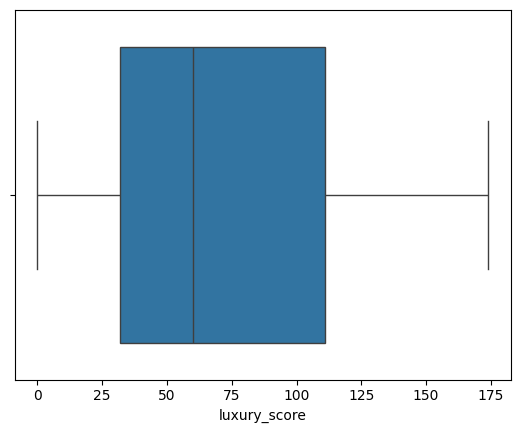

In [8]:
sns.boxplot(x = df['luxury_score'])

In [9]:
# Function to categorize luxury score into bins
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 4,0.67,3,2,1,1,Moderately Old,783.0,0,0,0,1,1,0,19,Low
1,flat,sector 104,0.65,3,2,2,7,New Property,848.0,0,0,0,0,0,0,65,Medium
2,house,sector 86,2.47,4,4,3+,0,Moderately Old,2800.0,0,1,0,1,0,2,130,Medium
3,flat,sector 70,1.65,3,4,3,5,Relatively New,1527.0,0,1,0,0,1,2,49,Low
4,flat,sector 48,6.25,3,5,3+,5,Moderately Old,3200.0,0,1,0,0,0,2,49,Low


### floorNum

<Axes: xlabel='floorNum'>

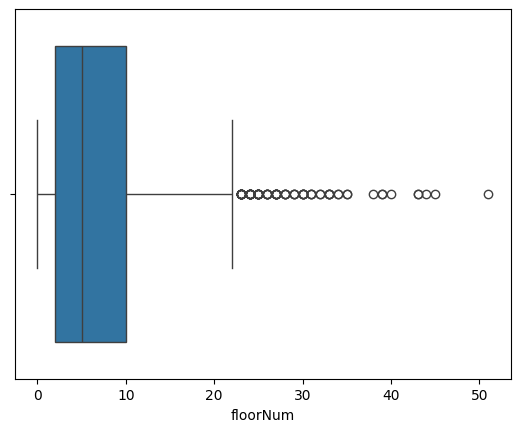

In [12]:
sns.boxplot(x = df['floorNum'])

In [13]:
# Function to categorize floor number into bins
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 4,0.67,3,2,1,1,Moderately Old,783.0,0,0,0,1,1,0,19,Low,Low Floor
1,flat,sector 104,0.65,3,2,2,7,New Property,848.0,0,0,0,0,0,0,65,Medium,Mid Floor
2,house,sector 86,2.47,4,4,3+,0,Moderately Old,2800.0,0,1,0,1,0,2,130,Medium,Low Floor
3,flat,sector 70,1.65,3,4,3,5,Relatively New,1527.0,0,1,0,0,1,2,49,Low,Mid Floor
4,flat,sector 48,6.25,3,5,3+,5,Moderately Old,3200.0,0,1,0,0,0,2,49,Low,Mid Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 4,0.67,3,2,1,Moderately Old,783.0,0,0,0,1,1,0,Low,Low Floor
1,flat,sector 104,0.65,3,2,2,New Property,848.0,0,0,0,0,0,0,Medium,Mid Floor
2,house,sector 86,2.47,4,4,3+,Moderately Old,2800.0,0,1,0,1,0,2,Medium,Low Floor
3,flat,sector 70,1.65,3,4,3,Relatively New,1527.0,0,1,0,0,1,2,Low,Mid Floor
4,flat,sector 48,6.25,3,5,3+,Moderately Old,3200.0,0,1,0,0,0,2,Low,Mid Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns # selecting categorical columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]]) # This creates a DataFrame, not a Series — because OrdinalEncoder expects a 2D input ([[col]] not [col]).
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,49.0,3,2,1.0,0.0,783.0,0,0,0,1,1,0,1.0,1.0
1,0.0,8.0,3,2,2.0,1.0,848.0,0,0,0,0,0,0,2.0,2.0
2,1.0,100.0,4,4,4.0,0.0,2800.0,0,1,0,1,0,2,2.0,1.0
3,0.0,82.0,3,4,3.0,3.0,1527.0,0,1,0,0,1,2,1.0,2.0
4,0.0,56.0,3,5,4.0,0.0,3200.0,0,1,0,0,0,2,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,94.0,2,2,1.0,3.0,586.0,0,0,0,0,0,0,1.0,0.0
3549,0.0,113.0,2,2,1.0,1.0,590.0,0,0,0,0,0,0,1.0,2.0
3550,0.0,46.0,3,3,3.0,3.0,1692.0,0,0,0,0,1,0,1.0,0.0
3551,1.0,59.0,6,6,0.0,0.0,4861.0,0,0,0,0,0,0,1.0,1.0


In [20]:
y_label

0        0.67
1        0.65
2        2.47
3        1.65
4        6.25
        ...  
3548     0.40
3549     0.45
3550     1.50
3551    13.20
3552     0.88
Name: price, Length: 3553, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

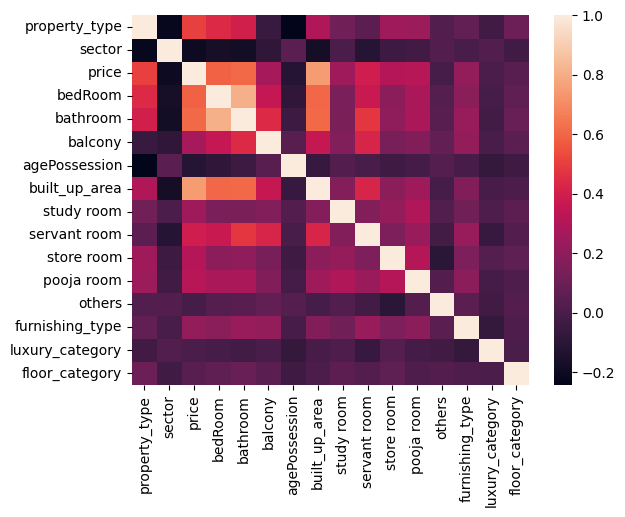

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [34]:
fi_df1 = data_label_encoded.corr()['price'].drop('price').reset_index().rename(columns={'index':'feature','price':'corr_coeff'}).sort_values(by='corr_coeff', ascending=False) 
fi_df1

,feature,corr_coeff
6,built_up_area,0.748579
3,bathroom,0.609759
2,bedRoom,0.591575
0,property_type,0.504376
8,servant room,0.391856
10,pooja room,0.319801
9,store room,0.305644
4,balcony,0.269519
7,study room,0.242368
12,furnishing_type,0.215740


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.645242
0,property_type,0.105613
1,sector,0.103592
2,bedRoom,0.025865
3,bathroom,0.023290
8,servant room,0.020233
5,agePossession,0.014273
4,balcony,0.012806
7,study room,0.009326
9,store room,0.009303


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.681480
1,sector,0.105541
0,property_type,0.096191
2,bedRoom,0.036788
3,bathroom,0.035785
8,servant room,0.021417
9,store room,0.009992
5,agePossession,0.004524
7,study room,0.003412
4,balcony,0.001863


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.785757
0,property_type,0.213989
1,sector,0.166537
8,servant room,0.020485
2,bedRoom,0.017877
3,bathroom,0.007408
5,agePossession,0.005779
12,furnishing_type,0.001728
10,pooja room,0.001398
4,balcony,0.001008


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.510824
0,property_type,0.706734
3,bathroom,0.279931
9,store room,0.198871
7,study room,0.177309
8,servant room,0.167252
12,furnishing_type,0.138919
10,pooja room,0.075271
13,luxury_category,0.050912
2,bedRoom,0.018529


### Technique 6 - RFE (RandomForestRegressor)

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.648758
1,sector,0.105794
0,property_type,0.102043
3,bathroom,0.029059
2,bedRoom,0.023022
8,servant room,0.019363
5,agePossession,0.014665
4,balcony,0.012761
13,luxury_category,0.008408
12,furnishing_type,0.007724


### Technique 7 - Linear Regression Weights

In [28]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513297
0,property_type,0.704115
3,bathroom,0.287507
9,store room,0.203292
7,study room,0.185980
8,servant room,0.176219
12,furnishing_type,0.148268
10,pooja room,0.078395
13,luxury_category,0.061517
2,bedRoom,0.021102


### Technique 8 - SHAP

In [29]:
!pip install shap

In [30]:
pip install numpy==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

c:\Users\wasia\Desktop\Data Science\Data science Property Price Prediction Project\env313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ 0.50304243,  0.12022023, -0.02836214, ..., -0.012714  ,
        -0.0088653 , -0.01661985],
       [-0.1907097 , -0.06260673, -0.06470029, ..., -0.0038584 ,
        -0.00215868, -0.01252875],
       [ 1.02651276, -1.93514875, -0.07354416, ...,  0.04639899,
         0.02499789,  0.01277335],
       ...,
       [-0.27987758, -0.06140015, -0.02571123, ..., -0.00972376,
        -0.00876979,  0.07903094],
       [ 1.22807967,  0.86521054,  0.43338921, ...,  0.06524016,
        -0.02568824,  0.08389191],
       [-0.23080786, -0.3524295 , -0.01755165, ..., -0.01520743,
        -0.02268352, -0.02135697]], shape=(3553, 15))

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.244295
0,property_type,0.475543
1,sector,0.383100
3,bathroom,0.114066
8,servant room,0.097405
2,bedRoom,0.058209
4,balcony,0.042059
5,agePossession,0.025836
14,floor_category,0.022527
12,furnishing_type,0.021404


In [37]:
final_fi_df = (
    fi_df1
    .merge(fi_df2, on='feature')
    .merge(fi_df3, on='feature')
    .merge(fi_df4, on='feature')
    .merge(fi_df5, on='feature')
    .merge(fi_df6, on='feature')
    .merge(fi_df7, on='feature')
    .merge(fi_df8, on='feature')
    .set_index('feature')
)

In [38]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.748579,0.645242,0.681480,0.785757,1.510824,0.648758,1.513297,1.244295
bathroom,0.609759,0.023290,0.035785,0.007408,0.279931,0.029059,0.287507,0.114066
bedRoom,0.591575,0.025865,0.036788,0.017877,0.018529,0.023022,0.021102,0.058209
property_type,0.504376,0.105613,0.096191,0.213989,0.706734,0.102043,0.704115,0.475543
servant room,0.391856,0.020233,0.021417,0.020485,0.167252,0.019363,0.176219,0.097405
pooja room,0.319801,0.005972,0.000000,0.001398,0.075271,0.006096,0.078395,0.009110
store room,0.305644,0.009303,0.009992,-0.002403,0.198871,0.006821,0.203292,0.017558
balcony,0.269519,0.012806,0.001863,0.001008,-0.045288,0.012761,-0.068277,0.042059
study room,0.242368,0.009326,0.003412,-0.000527,0.177309,0.006442,0.185980,0.021212


In [39]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [40]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.191198,0.645242,0.681480,0.644680,0.474417,0.648758,0.475686,0.486548
bathroom,0.155742,0.023290,0.035785,0.006078,0.087902,0.029059,0.090374,0.044602
bedRoom,0.151097,0.025865,0.036788,0.014667,0.005818,0.023022,0.006633,0.022761
property_type,0.128825,0.105613,0.096191,0.175569,0.221923,0.102043,0.221330,0.185948
servant room,0.100086,0.020233,0.021417,0.016807,0.052519,0.019363,0.055392,0.038088
pooja room,0.081682,0.005972,0.000000,0.001147,0.023636,0.006096,0.024643,0.003562
store room,0.078066,0.009303,0.009992,-0.001971,0.062448,0.006821,0.063902,0.006865
balcony,0.068839,0.012806,0.001863,0.000827,-0.014221,0.012761,-0.021462,0.016446
study room,0.061904,0.009326,0.003412,-0.000433,0.055677,0.006442,0.058460,0.008294


In [41]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.621342
property_type      0.133073
sector             0.120273
bathroom           0.027763
bedRoom            0.024621
servant room       0.023182
agePossession      0.009661
balcony            0.008941
store room         0.006202
study room         0.005408
furnishing_type    0.005329
luxury_category    0.004827
floor_category     0.004256
pooja room         0.003355
others             0.001768
dtype: float64

In [42]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,49.0,3,2,1.0,0.0,783.0,0,0,0,1,1,0,1.0,1.0
1,0.0,8.0,3,2,2.0,1.0,848.0,0,0,0,0,0,0,2.0,2.0
2,1.0,100.0,4,4,4.0,0.0,2800.0,0,1,0,1,0,2,2.0,1.0
3,0.0,82.0,3,4,3.0,3.0,1527.0,0,1,0,0,1,2,1.0,2.0
4,0.0,56.0,3,5,4.0,0.0,3200.0,0,1,0,0,0,2,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,94.0,2,2,1.0,3.0,586.0,0,0,0,0,0,0,1.0,0.0
3549,0.0,113.0,2,2,1.0,1.0,590.0,0,0,0,0,0,0,1.0,2.0
3550,0.0,46.0,3,3,3.0,3.0,1692.0,0,0,0,0,1,0,1.0,0.0
3551,1.0,59.0,6,6,0.0,0.0,4861.0,0,0,0,0,0,0,1.0,1.0


In [43]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [45]:
scores.mean()

np.float64(0.8132575316179571)

In [46]:
# with pooja room, study room, others columns dropped
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [47]:
scores.mean()

np.float64(0.8112077839074472)

 As we can see that dropping the columns pooja room, study room, others has no changes on the model performance so we can drop these columns from the final dataset.

In [49]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [50]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,49.0,3,2,1.0,0.0,783.0,0,0,0,1.0,1.0,0.67
1,0.0,8.0,3,2,2.0,1.0,848.0,0,0,0,2.0,2.0,0.65
2,1.0,100.0,4,4,4.0,0.0,2800.0,1,0,2,2.0,1.0,2.47
3,0.0,82.0,3,4,3.0,3.0,1527.0,1,0,2,1.0,2.0,1.65
4,0.0,56.0,3,5,4.0,0.0,3200.0,1,0,2,1.0,2.0,6.25


In [54]:
export_df.shape

(3553, 13)

In [51]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [52]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pymysql
import pyodbc

# Load .env variables
from dotenv import load_dotenv
print(load_dotenv())

# Create MySQL connection (AWS RDS)
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASS')}@{os.getenv('MYSQL_HOST')}/{os.getenv('MYSQL_DB')}"
)

# Create MSSQL connection
mssql_engine = create_engine(
    f"mssql+pyodbc://{os.getenv('MSSQL_USER')}:{os.getenv('MSSQL_PASS')}@{os.getenv('MSSQL_HOST')}/{os.getenv('MSSQL_DB')}?driver={os.getenv('MSSQL_DRIVER')}&Encrypt=yes&TrustServerCertificate=no"
)

True


In [55]:
export_df.to_sql("gurgaon_properties_post_feature_selection", con=mysql_engine, if_exists='replace', index=False)

3553

In [58]:
export_df.to_sql("gurgaon_properties_post_feature_selection", con=mssql_engine, if_exists='replace', index=False)

11